<a href="https://colab.research.google.com/gist/ajaytiwari-isb/e15bb62ca9e29229df573bbe0981d6c5/positive-severity-gamma2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
from statsmodels.graphics.api import abline_plot

In [0]:
# Reading csv data
df = pd.read_csv('data1.csv')

Data Check

In [3]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (378, 11)


In [4]:
# Dropping duplicate rows
df1 = df.drop_duplicates()
df1.head(5)

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,X_OBSTAT_
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,01101 0 0 0
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,01101 0 0 0
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,01101 0 0 0
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,01101 0 0 0
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,01101 0 0 0


In [0]:
# Dropping observations with zero vehicle value
df2 = df1[df1.veh_value !=0]

Exploring Data

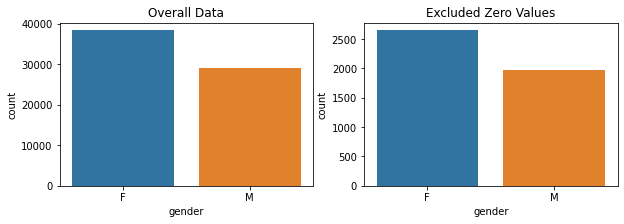

In [6]:
#Gender
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='gender',data=df2.sort_values('gender'), ax=ax1)
title = g.set_title('Overall Data')
g = sns.countplot(x='gender',data=df2[df2['numclaims']>0].sort_values('gender'), ax=ax2)
title = g.set_title('Excluded Zero Values')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


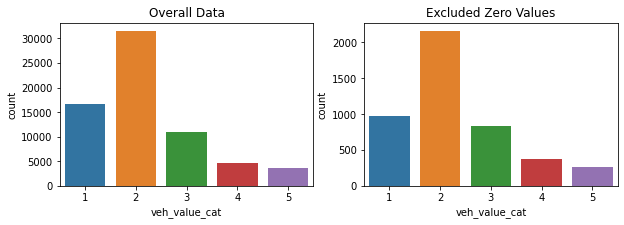

In [7]:
# Converting vehcile value as categorical
df2['veh_value_cat'] = df2['veh_value'].apply(lambda x:1 if x<=1 else 2 if x<=2 else 3 if x<=3 else 4 if x<=4 else 5)
#Graphs
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='veh_value_cat',data=df2, ax=ax1)
title = g.set_title('Overall Data')
g = sns.countplot(x='veh_value_cat',data=df2[df2['numclaims']>0], ax=ax2)
title = g.set_title('Excluded Zero Values')

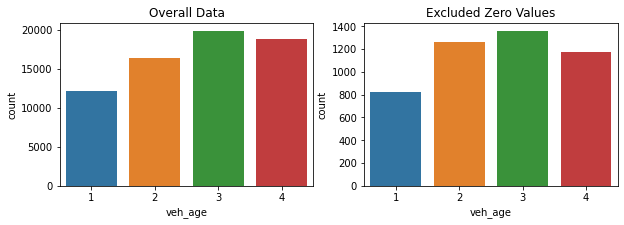

In [8]:
# Vehicle Age
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='veh_age',data=df2,ax=ax1)
title = g.set_title('Overall Data')
g = sns.countplot(x='veh_age',data=df2[df2['numclaims']>0], ax=ax2)
title = g.set_title('Excluded Zero Values')

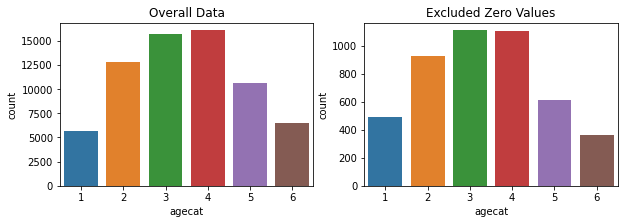

In [9]:
# Driver Age
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='agecat',data=df2, ax=ax1)
title = g.set_title('Overall Data')
g = sns.countplot(x='agecat',data=df2[df2['numclaims']>0],ax=ax2)
title = g.set_title('Excluded Zero Values')

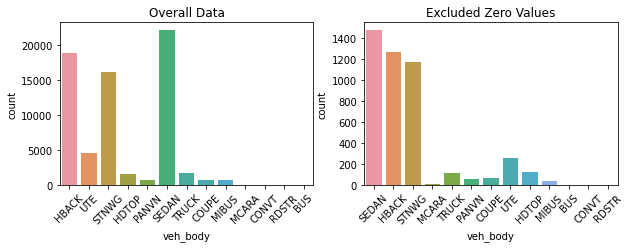

In [10]:
# Vehicle Body Type
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='veh_body',data=df2,ax=ax1)
label = g.set_xticklabels(g.get_xticklabels(), rotation=45)
title = g.set_title('Overall Data')
g = sns.countplot(x='veh_body',data=df2[df2['numclaims']>0], ax=ax2)
label = g.set_xticklabels(g.get_xticklabels(), rotation=45)
title = g.set_title('Excluded Zero Values')

In [11]:
#Grouping bottom categories as "others"
series = pd.value_counts(df2.veh_body)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df2['veh_body'] = np.where(df2['veh_body'].isin(series[mask].index),'Other',df2['veh_body'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
# Converting into string
df3 = df2.astype({"veh_body":str,"veh_age":str,"gender":str,"area":str,"agecat":str,"veh_value_cat":str})

In [0]:
#Extracting subset of data having a claim
df4 = df3[df3.clm == 1]

In [0]:
#Removing observations beyond 99th percentile of claim cost
df_excl_0_99 = df4[df4.claimcst0 < np.percentile(df4.claimcst0,99)]

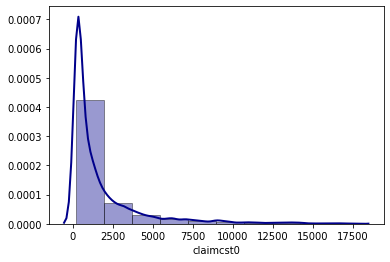

In [15]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df_excl_0_99['claimcst0'], hist=True, kde=True,
             bins=10,              
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

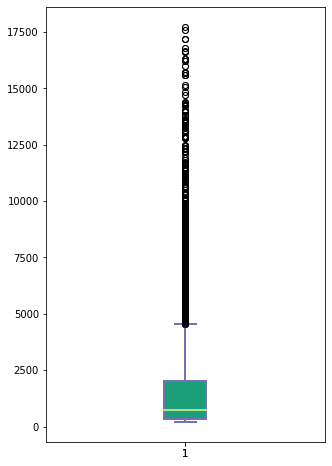

In [16]:
# Create a figure instance
fig = plt.figure(1, figsize=(5, 8))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df_excl_0_99['claimcst0'])

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(df_excl_0_99['claimcst0'], patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

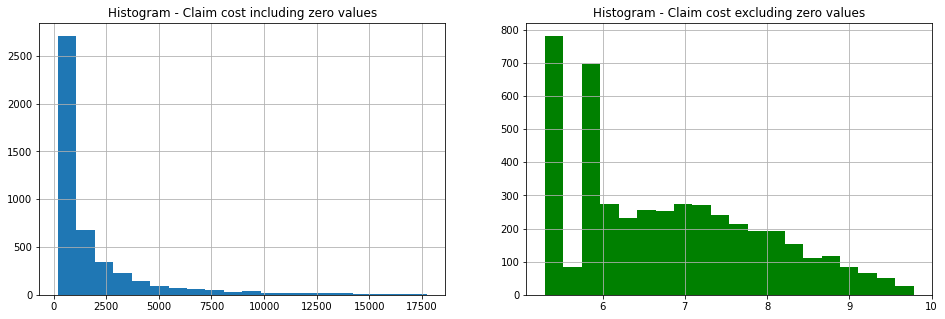

In [17]:
# Comparing original and log transformed values
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(df_excl_0_99['claimcst0'], bins=20)
ax1.set_title('Histogram - Claim cost including zero values')
ax1.grid(True)
ax2.hist(np.log(df_excl_0_99['claimcst0']), bins=20, color='g')
ax2.set_title('Histogram - Claim cost excluding zero values')
ax2.grid(True)
plt.show()

In [0]:
##from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() 
#df_excl_0_99[['veh_value']]= scaler.fit_transform(df_excl_0_99[['veh_value']])


In [18]:
# Training and test split
mask = np.random.rand(len(df_excl_0_99)) < 0.8
df_train = df_excl_0_99[mask]
df_test = df_excl_0_99[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=3664
Testing data set length=907


Gauss - Log

In [0]:
# Model expression
expr = """claimcst0 ~ veh_value+veh_age+gender+area+agecat"""

In [0]:
# Converting data into dmatrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [21]:
# Training model
gauss_log = sm.GLM(y_train, X_train, exposure=df_train.numclaims,family=sm.families.Gaussian(sm.families.links.log)).fit()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [22]:
print(gauss_log.summary2())

                  Results: Generalized linear model
Model:              GLM              AIC:            67667.3580      
Link Function:      log              BIC:            22300044605.7269
Dependent Variable: claimcst0        Log-Likelihood: -33818.         
Date:               2020-03-29 18:03 LL-Null:        -33862.         
No. Observations:   3664             Deviance:       2.2300e+10      
Df Model:           15               Pearson chi2:   2.23e+10        
Df Residuals:       3648             Scale:          6.1130e+06      
Method:             IRLS                                             
----------------------------------------------------------------------
                   Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------------
Intercept          7.6122    0.1127  67.5414  0.0000   7.3914   7.8331
veh_age[T.2]      -0.0006    0.0794  -0.0080  0.9936  -0.1564   0.1551
veh_age[T.3]       0.0739    0.07

In [0]:
# Predict
ypred = gauss_log.predict(X_test)

In [24]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error 
rmse =np.sqrt(mean_squared_error(y_test,ypred))
rmse

2731.8863497474526

Gamma - Log

In [0]:
# Model Expression
expr = """claimcst0 ~ veh_value+veh_age+gender+area+agecat"""

In [0]:
# Converting data into dmatrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [27]:
# Training model
model_gamma = sm.GLM(y_train, X_train,exposure=df_train.numclaims,family=sm.families.Gamma(link=sm.families.links.log)).fit()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [28]:
print(model_gamma.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            62560.9053 
Link Function:      log              BIC:            -24946.5856
Dependent Variable: claimcst0        Log-Likelihood: -31264.    
Date:               2020-03-29 18:03 LL-Null:        -31303.    
No. Observations:   3664             Deviance:       4990.0     
Df Model:           15               Pearson chi2:   7.55e+03   
Df Residuals:       3648             Scale:          2.0693     
Method:             IRLS                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept         7.5433   0.1176 64.1649 0.0000  7.3129  7.7737
veh_age[T.2]      0.0842   0.0735  1.1446 0.2524 -0.0600  0.2283
veh_age[T.3]      0.1673   0.0767  2.1806 0.0292  0.0169  0.3177
veh_age[T.4]      0.2157   0.0861  2.5048

In [0]:
# Predict
ypred = model_gamma.predict(X_test)

In [30]:
# RMSE
from sklearn.metrics import mean_squared_error 
rmse =np.sqrt(mean_squared_error(y_test,ypred))
rmse

2720.253527526858

In [31]:
model_predictions = model_gamma.get_prediction(X_train)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = model_predictions.summary_frame()
print(predictions_summary_frame)

              mean     mean_se  mean_ci_lower  mean_ci_upper
14     1629.771557  174.745554    1320.870219    2010.913176
16     1994.841870  233.776772    1585.461249    2509.928319
40     2141.831259  249.183346    1705.121747    2690.389207
64     1857.901086  223.669761    1467.397540    2352.325359
65     1523.047881  118.533329    1307.578008    1774.024060
...            ...         ...            ...            ...
67770  1563.197424  172.955676    1258.447143    1941.747177
67797  1791.556703  190.202464    1454.996233    2205.968199
67815  1627.277305  131.488915    1388.934977    1906.519362
67847  1898.622093  173.801387    1586.787823    2271.737783
67854  1684.725841  133.250133    1442.796557    1967.222022

[3664 rows x 4 columns]


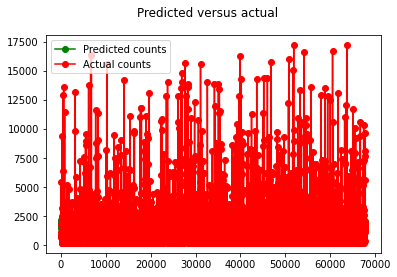

In [32]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_train['claimcst0']
fig = plt.figure()
fig.suptitle('Predicted versus actual')
predicted, = plt.plot(X_train.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_train.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

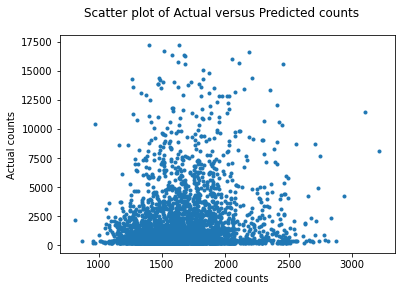

In [33]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

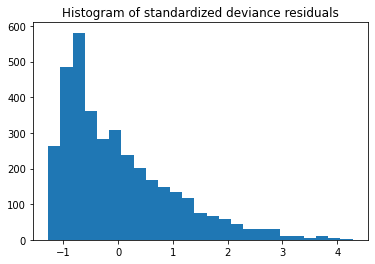

In [34]:
from scipy import stats

fig, ax = plt.subplots()

resid = model_gamma.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');


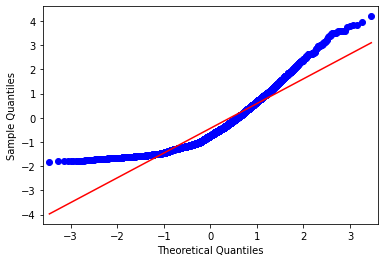

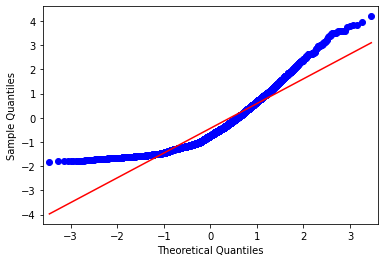

In [35]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')